In [1]:
import sys, os
import datetime
from settings import *

sys.path.insert(0, PYSBF_PATH)
from pysbf import *


from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

import IPython
IPython.display.HTML('<style> select, textarea, input { font-family: Courier New; } </style>')


## Set galaxy name

In [2]:
name = "u12517"

In [3]:
IN_FOLDER, OUT_FOLDER

('/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3/',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/')

In [4]:
outFolder = OUT_FOLDER + "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"

df_log = open_log_df(logFile)
uuid = df_log.at["uuid", "value"]

X0 = int(float(df_log.at["X0", "value"])) # Object Center X0 [pixel]
Y0 = int(float(df_log.at["Y0", "value"])) # Object Center X0 [pixel]
XX = int(float(df_log.at["X_pixels", "value"]))
YY = int(float(df_log.at["Y_pixels", "value"]))
# _ = Logtext(logFile, "log file")

# df_log

In [5]:
sky_sigma = float(df_log.at["sky_std", "value"])

In [6]:
sky_sigma

97.09

- not different by a lot
- model pswf --> blur psf
- trying multiple psf --> averaging out the results, or using them for error measuremnt
- combinedj.on.bright.psf.14219 sharpest one, good starting 
- PSFstd --> mode l psf from space teelscope
- PSF = inFolder+"/psflibrary/PSFSTD_WFC3IR_F110W.fits"

In [7]:
IN_FOLDER

'/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3/'

In [8]:
PSF = IN_FOLDER+"/psflibrary/combinedj.on.psf.14654"  # --> refer to the project
PSF = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/e137024/e137j.psf3"

In [9]:
! ls {IN_FOLDER}"/psflibrary/combined*"

ls: cannot access '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combined*': No such file or directory


In [10]:
import glob

psf_list = glob.glob(IN_FOLDER+"/psflibrary/combinedj*")
psf_list

['/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14654',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.11712',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.bright.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.bright.psf.14219']

point source mask, comes from likenew6 (tuned for infrared bands)

- ptm6 default output of likenew: sometimes misses objects that are super bright
- ptm6b --> produced after further manipulations

In [11]:
DIR = "{}{}_{}/".format(outFolder, name, uuid)

config = {
    "DIR": DIR,
    "PSF": PSF,
    "PRF": "model.000",
    "RSD": "resid.000",
#     "PTM": "{}_se_lknjj.ptm6b".format(name),
    "PTM": "{}/hybridj.ptm6b".format(DIR),
    }

W = SBF_widgets(XX, YY, X0, Y0, **config)

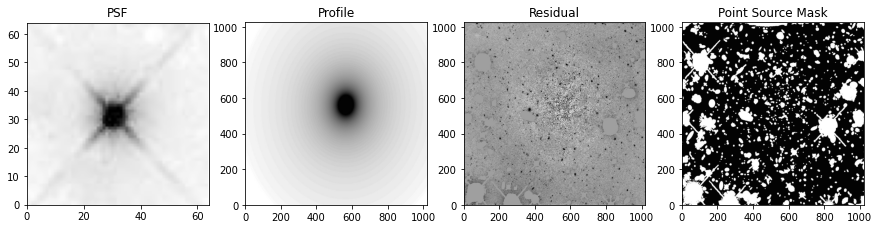

In [12]:
_ = eval_plots(config)

In [13]:
W.settings()

In [14]:
dir(W)

['DIR',
 'PRF',
 'PSF',
 'PTM',
 'RSD',
 'X0',
 'XX',
 'Y0',
 'YY',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_angle',
 '_angle_b',
 '_k_fit',
 '_psf_k',
 '_radius',
 'angle',
 'get_sbf',
 'get_sbf_all',
 'get_sbf_iter',
 'k_fit',
 'psf_k',
 'radius',
 'settings']

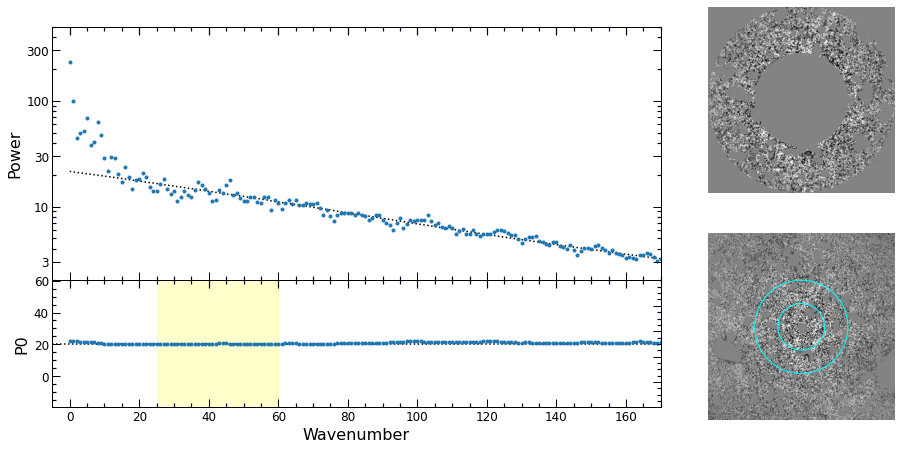

In [15]:
(ax1, ax2, ax3, ax4), psf_info, P0 = W.get_sbf()
# ax2.set_ylim(130, 140)

In [16]:
# plotting all iteration on top of each other
# sky_sigma get from the log file
# flagging the tv commands when doing iterations


## PSF power spectrum

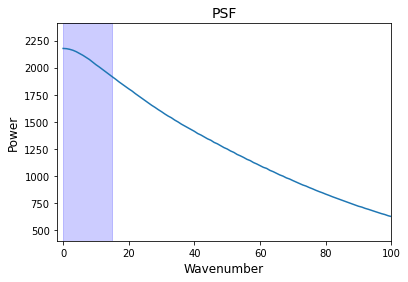

In [17]:
ax = plot_psf_power(psf_info, K_upper_limit = 100)

In [18]:
W.get_sbf_all(angle_range=(10,180))

0 32 - 64
1 64 - 128
2 128 - 256


{'c0': (22.6, 0.563), 'c1': (21.07, 0.19), 'c2': (15.53, 0.145)}

In [19]:
# P0, dP0
W.get_sbf_all()

0 32 - 64
1 64 - 128
2 128 - 256


{'c0': (22.06, 0.352), 'c1': (20.22, 0.159), 'c2': (15.61, 0.158)}

In [20]:
len(psf_list)

6

In [21]:
psf_list

['/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14654',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.11712',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.bright.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.bright.psf.14219']

In [22]:
# W.get_sbf_iter?

In [23]:
sky_sigma

97.09

In [24]:
R = W.get_sbf_iter(n_iter=100, sky_sigma=sky_sigma, psf_list=psf_list)

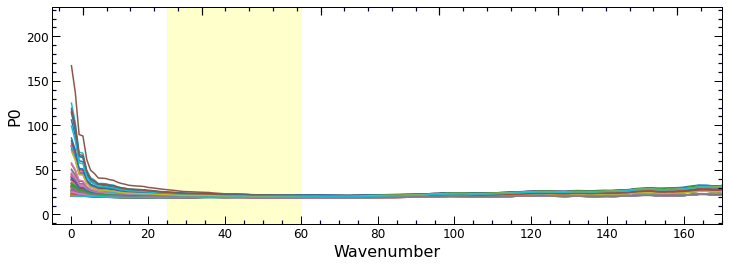

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

for k, v in R.items():
    ax.plot(v["K"],v["P"])

ax.set_ylabel("P0", fontsize=16)
ax.set_xlabel("Wavenumber", fontsize=16)

x_ax, y_ax = set_axes(ax, fontsize=12)
ax.set_xlim(-5, 170)
# ax.set_ylim(P0_h - 40, P0_h + 40)

KS0, KS1 = W._k_fit.value
ax.axvspan(KS0, KS1, color="yellow", alpha=0.2)
